In [1]:
import pandas as pd
import numpy as np

In [142]:
df = pd.read_csv('ratings.csv')

In [143]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [144]:
movies_titles = pd.read_csv('movies.csv')

In [145]:
movies_titles = movies_titles[['movieId', 'title']]
# movies_titles.head()

In [146]:
movies_titles.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [147]:
df = pd.merge(df, movies_titles, on='movieId')

In [149]:
df.head()

,userId,movieId,rating,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,5,1,4.0,847434962,Toy Story (1995)
2,7,1,4.5,1106635946,Toy Story (1995)
3,15,1,2.5,1510577970,Toy Story (1995)
4,17,1,4.5,1305696483,Toy Story (1995)


In [151]:
import matplotlib.pyplot as plt

In [152]:
import seaborn as sns

In [153]:
sns.set_style('white')

In [154]:
%matplotlib inline

In [156]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [157]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [158]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [159]:
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [161]:
ratings['no of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [163]:
ratings.head()

,rating,no of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


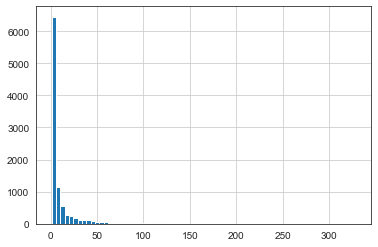

In [164]:
ratings['no of ratings'].hist(bins=70)

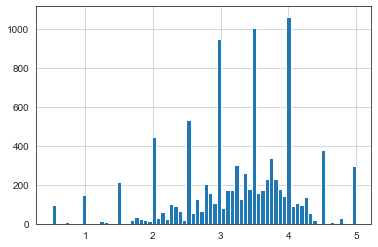

In [165]:
ratings['rating'].hist(bins=70)

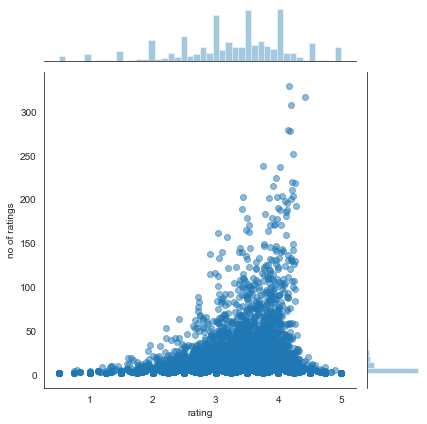

In [166]:
sns.jointplot(x='rating', y='no of ratings', data=ratings, alpha=0.5)

In [167]:
df.head()

,userId,movieId,rating,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,5,1,4.0,847434962,Toy Story (1995)
2,7,1,4.5,1106635946,Toy Story (1995)
3,15,1,2.5,1510577970,Toy Story (1995)
4,17,1,4.5,1305696483,Toy Story (1995)


In [168]:
moviemat = df.pivot_table(index='userId', columns='title', values='rating')

In [169]:
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
ratings.sort_values('no of ratings', ascending=False).head(10)

,rating,no of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [172]:
forrest_gump_ratings = moviemat['Forrest Gump (1994)']
matrix_ratings = moviemat['Matrix, The (1999)']

In [173]:
similar_to_forrest_gump = moviemat.corrwith(forrest_gump_ratings)

C:\Users\Vikas\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Vikas\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [174]:
similar_to_matrix = moviemat.corrwith(matrix_ratings)

In [176]:
corr_forrest_gump = pd.DataFrame(similar_to_forrest_gump, columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)

In [177]:
corr_forrest_gump.head()

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [178]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head()

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0


In [179]:
corr_forrest_gump = corr_forrest_gump.join(ratings['no of ratings'])

In [180]:
corr_forrest_gump.head()

,Correlation,no of ratings
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [181]:
corr_forrest_gump[corr_forrest_gump['no of ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,no of ratings
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125


In [182]:
corr_matrix = pd.DataFrame(similar_to_matrix, columns=['Correlation'])

In [184]:
corr_matrix.dropna(inplace=True)
corr_matrix.head()

,Correlation
title,
"'burbs, The (1989)",-0.160843
(500) Days of Summer (2009),0.302316
*batteries not included (1987),0.392232
...And Justice for All (1979),0.654654
10 Cent Pistol (2015),-1.000000


In [187]:
corr_matrix = corr_matrix.join(ratings['no of ratings'])

In [188]:
corr_matrix.head()

,Correlation,rating,no of ratings
title,,,
"'burbs, The (1989)",-0.160843,3.176471,17
(500) Days of Summer (2009),0.302316,3.666667,42
*batteries not included (1987),0.392232,3.285714,7
...And Justice for All (1979),0.654654,3.166667,3
10 Cent Pistol (2015),-1.000000,1.250000,2


In [190]:
corr_matrix[corr_matrix['no of ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,rating,no of ratings
title,,,
"Matrix, The (1999)",1.000000,4.192446,278
Die Hard (1988),0.544466,3.862069,145
Inception (2010),0.514767,4.066434,143
Braveheart (1995),0.496045,4.031646,237
Aliens (1986),0.470865,3.964286,126
